<a href="https://colab.research.google.com/github/minhyeok2001/Computer-Vision/blob/main/U_NET_for_ISBI_2012_EM_stacks_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 준비

In [1]:
!git clone https://github.com/hanyoseob/youtube-cnn-002-pytorch-unet.git
%cd youtube-cnn-002-pytorch-unet
!ls

fatal: destination path 'youtube-cnn-002-pytorch-unet' already exists and is not an empty directory.
/content/youtube-cnn-002-pytorch-unet
data_read.py  datasets		  eval.py   README.md	    train.py
dataset.py    display_results.py  model.py  run_unet.ipynb  util.py


Train Inputs Shape: (24, 512, 512)
Train Labels Shape: (24, 512, 512)
Validation Inputs Shape: (3, 512, 512)
Validation Labels Shape: (3, 512, 512)
Test Inputs Shape: (3, 512, 512)
Test Labels Shape: (3, 512, 512)


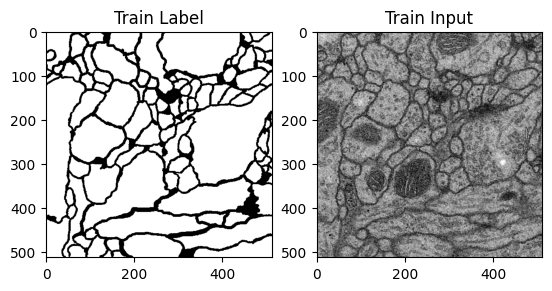

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 데이터 경로 설정
dir_data = './datasets'
name_label = 'train-labels.tif'
name_input = 'train-volume.tif'

# 이미지 열기
img_label = Image.open(os.path.join(dir_data, name_label))
img_input = Image.open(os.path.join(dir_data, name_input))

# 이미지 크기 및 프레임 수 확인
ny, nx = img_label.size
nframe = img_label.n_frames

# 데이터셋 분리 크기 설정
nframe_train = 24
nframe_val = 3
nframe_test = 3

# 프레임 셔플
id_frame = np.arange(nframe)
np.random.shuffle(id_frame)

# 데이터를 저장할 리스트
inputs_train, labels_train = [], []  # 학습 데이터
inputs_val, labels_val = [], []      # 검증 데이터
inputs_test, labels_test = [], []    # 테스트 데이터

# 학습 데이터 수집
offset_nframe = 0
for i in range(nframe_train):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])
    labels_train.append(np.asarray(img_label))
    inputs_train.append(np.asarray(img_input))

# 검증 데이터 수집
offset_nframe = nframe_train
for i in range(nframe_val):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])
    labels_val.append(np.asarray(img_label))
    inputs_val.append(np.asarray(img_input))

# 테스트 데이터 수집
offset_nframe = nframe_train + nframe_val
for i in range(nframe_test):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])
    labels_test.append(np.asarray(img_label))
    inputs_test.append(np.asarray(img_input))

# 리스트를 NumPy 배열로 변환
inputs_train = np.array(inputs_train)
labels_train = np.array(labels_train)
inputs_val = np.array(inputs_val)
labels_val = np.array(labels_val)
inputs_test = np.array(inputs_test)
labels_test = np.array(labels_test)

# 저장된 데이터 확인
print(f"Train Inputs Shape: {inputs_train.shape}")
print(f"Train Labels Shape: {labels_train.shape}")
print(f"Validation Inputs Shape: {inputs_val.shape}")
print(f"Validation Labels Shape: {labels_val.shape}")
print(f"Test Inputs Shape: {inputs_test.shape}")
print(f"Test Labels Shape: {labels_test.shape}")

# 첫 번째 학습 데이터 시각화
plt.subplot(121)
plt.imshow(labels_train[0], cmap='gray')
plt.title('Train Label')

plt.subplot(122)
plt.imshow(inputs_train[0], cmap='gray')
plt.title('Train Input')

plt.show()

- 225인 값 1로 바꾸기

In [3]:
labels_train = [np.where(labels_train[i]==255,1,0) for i in range(len(labels_train))]
labels_val = [np.where(labels_val[i]==255,1,0) for i in range(len(labels_val))]
labels_test = [np.where(labels_test[i]==255,1,0) for i in range(len(labels_test))]

In [4]:
print(labels_train[0][1])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

## 데이터로더 올리기

In [5]:
import torch
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])

])

class customDataset(torch.utils.data.Dataset) :
  def __init__(self,inputs,labels,transform):
    self.inputs = inputs
    self.labels = labels
    self.transform = transform

  def __len__(self):
    return len(self.inputs)

  def __getitem__(self,idx):

    input = self.inputs[idx]
    label = self.labels[idx]

    if self.transform:
      input = transform(input)

    return input,label

In [6]:
train = customDataset(inputs_train,labels_train,transform)
val = customDataset(inputs_val,labels_val,transform)
test = customDataset(inputs_test,labels_test,transform)

In [7]:
train_loader = torch.utils.data.DataLoader(train,batch_size=4,shuffle=True)
val_loader = torch.utils.data.DataLoader(val,batch_size=4,shuffle=True)
test_loader = torch.utils.data.DataLoader(test,batch_size=4,shuffle=True)

- 데이터 확인

In [8]:
for input, label in train_loader:
  print(input)
  print(label)
  break

tensor([[[[-0.0118, -0.1608, -0.0431,  ...,  0.2627,  0.2863,  0.3882],
          [ 0.0824, -0.0745, -0.0353,  ...,  0.2000,  0.1686,  0.2000],
          [ 0.1059,  0.0588,  0.1373,  ...,  0.1294,  0.1373,  0.0745],
          ...,
          [ 0.2157,  0.1686,  0.3176,  ...,  0.0902, -0.0980, -0.0588],
          [ 0.2784,  0.2078,  0.3020,  ...,  0.2392,  0.1059,  0.1608],
          [ 0.1843,  0.1059,  0.2549,  ...,  0.4353,  0.2863,  0.3412]]],


        [[[-0.3490, -0.4667, -0.4980,  ..., -0.5059, -0.5686, -0.4039],
          [-0.2784, -0.6314, -0.6157,  ..., -0.4667, -0.1765, -0.3333],
          [-0.0902, -0.2078, -0.1686,  ..., -0.4745, -0.2627, -0.1529],
          ...,
          [ 0.2392, -0.0902, -0.1843,  ...,  0.0902, -0.6000, -0.5059],
          [ 0.0431, -0.2157, -0.2078,  ...,  0.1765,  0.0667, -0.3490],
          [-0.4118, -0.4275, -0.4275,  ...,  0.1451,  0.2627, -0.2000]]],


        [[[ 0.2706,  0.3804,  0.4353,  ..., -0.3882, -0.1451,  0.1922],
          [ 0.1373,  0.137

## U_NET 만들기


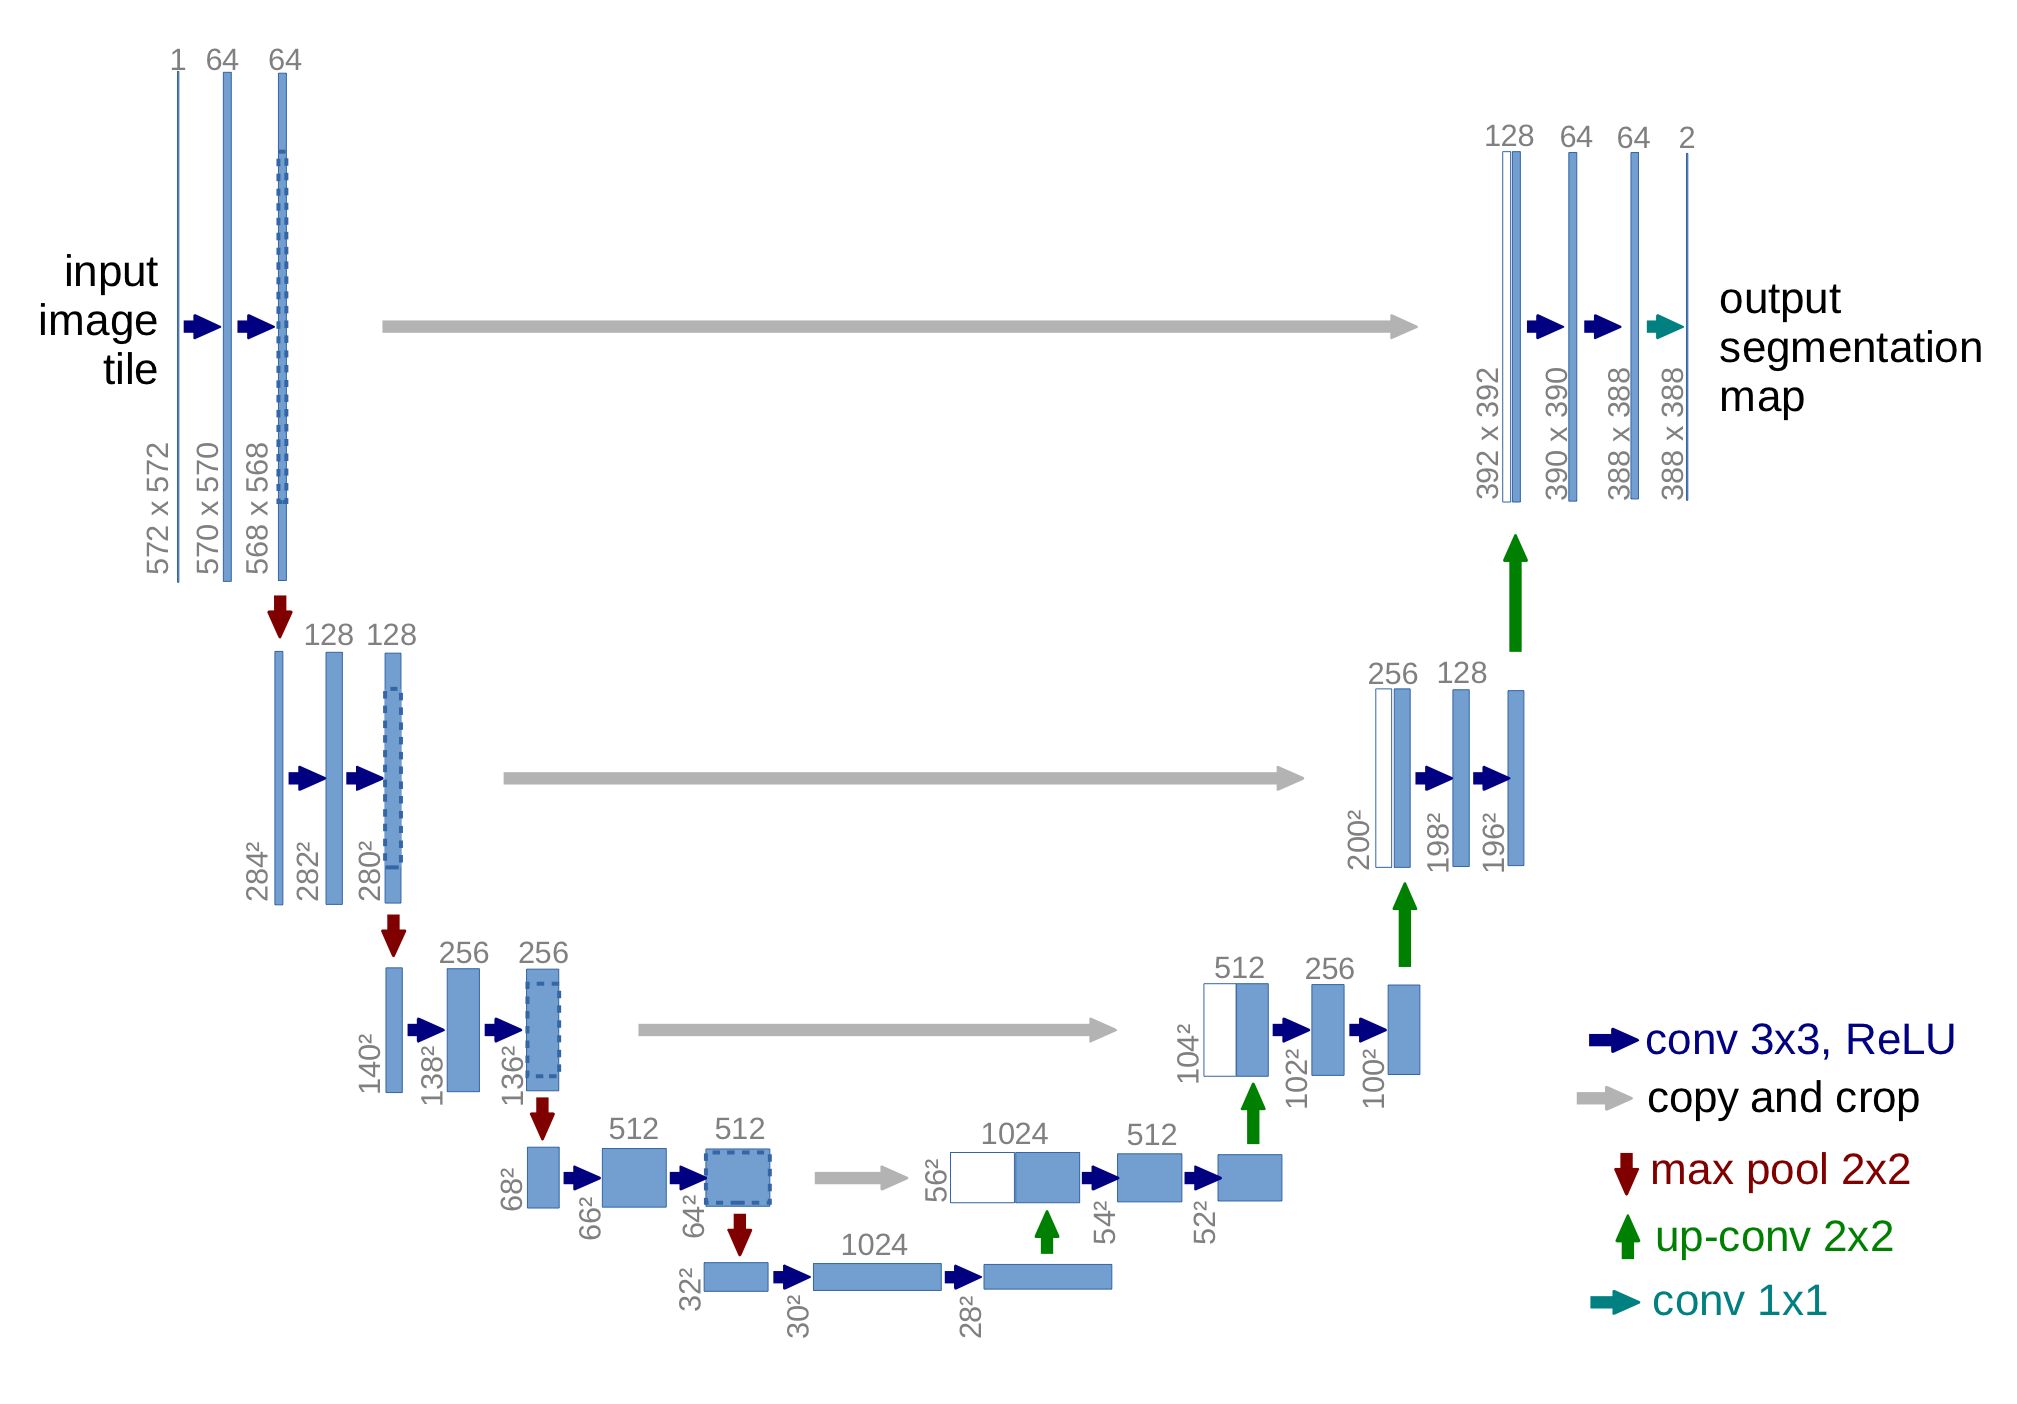

- batch norm은 activation 전에 적용

In [9]:
import torch.nn as nn

class u_block(nn.Module):
  def __init__(self,in_channels,out_channels,kernel_size=3,padding=1,crop_add=False):
    super().__init__()
    self.conv = nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=kernel_size,padding=padding)
    self.bn = nn.BatchNorm2d(out_channels)
    self.act = nn.ReLU()

  def forward(self,x):
    x = self.conv(x)
    x = self.bn(x)
    x = self.act(x)

    return x


# notation / d11 : down 1st stair's  1st / f1 : flat 1st / u32 : up 3rd 2nd
class U_net(nn.Module):
  def __init__(self):
    super().__init__()
    self.d11 = u_block(1,64)
    self.d12 = u_block(64,64)
    self.pool = nn.MaxPool2d(2)

    self.d21 = u_block(64,128)
    self.d22 = u_block(128,128)

    self.d31 = u_block(128,256)
    self.d32 = u_block(256,256)

    self.d41 = u_block(256,512)
    self.d42 = u_block(512,512)

    self.f1 = u_block(512,1024)
    self.f2 = u_block(1024,1024)
    self.up_conv54 = nn.ConvTranspose2d(1024,512,kernel_size=2,stride=2,padding=0) ## 이렇게 해서 crop 말고 크기 맞춰주기

    self.u41 = u_block(1024,512)
    self.u42 = u_block(512,512)
    self.up_conv43 = nn.ConvTranspose2d(512,256,kernel_size=2,stride=2,padding=0)

    self.u31 = u_block(512,256)
    self.u32 = u_block(256,256)
    self.up_conv32 = nn.ConvTranspose2d(256,128,kernel_size=2,stride=2,padding=0)

    self.u21 = u_block(256,128)
    self.u22 = u_block(128,128)
    self.up_conv21 = nn.ConvTranspose2d(128,64,kernel_size=2,stride=2,padding=0)

    self.u11 = u_block(128,64)
    self.u12 = u_block(64,64)
    # self.up_conv_final = nn.ConvTranspose2d(64,2,kernel_size=2,stride=2,padding=0)  ## 흑 or 백 느낌으로 -> 이거 아니고 1x1 conv로 dim 낮췄음 !!
    self.conv_1x1 = u_block(64,2,kernel_size=1,padding=0)


  def forward(self,x):
    # down 1st
    x = self.d11(x)
    x = self.d12(x)
    skip_l1 = x
    x = self.pool(x)

    # down 2nd
    x = self.d21(x)
    x = self.d22(x)
    skip_l2 = x
    x = self.pool(x)

    # down 3rd
    x = self.d31(x)
    x = self.d32(x)
    skip_l3 = x
    x = self.pool(x)

    # down 4th
    x = self.d41(x)
    x = self.d42(x)
    skip_l4 = x
    x = self.pool(x)

    # flat
    x = self.f1(x)
    x = self.f2(x)
    x = self.up_conv54(x)

    # up 4th
    x = torch.cat((skip_l4,x),dim=1) ## B x C x W x H 라서 dim 1이여야 channel-wise하게 연결 가능
    x = self.u41(x)
    x = self.u42(x)
    x = self.up_conv43(x)

    # up 3rd
    x = torch.cat((skip_l3,x),dim=1)
    x = self.u31(x)
    x = self.u32(x)
    x = self.up_conv32(x)

    # up 2nd
    x = torch.cat((skip_l2,x),dim=1)
    x = self.u21(x)
    x = self.u22(x)
    x = self.up_conv21(x)

    # up 1st
    x = torch.cat((skip_l1,x),dim=1)
    x = self.u11(x)
    x = self.u12(x)
    x = self.conv_1x1(x)
    return x

In [10]:
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau

model = U_net()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)
early_stop_loss = float('inf')

patience = 5

for epoch in tqdm(range(10)):
  train_loss = 0.0
  val_loss = 0.0
  model.train()

  for input,label in tqdm(train_loader):
    label = label.long()
    #print(input.shape)
    #print(input)
    optimizer.zero_grad()
    output = model(input)
    #print(output.shape)
    loss = loss_fn(output,label)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  print("\ntrain loss -> ", train_loss/len(train_loader))
  model.eval()
  with torch.no_grad():
    for input,label in val_loader:
      input = input.float()
      #print(input)
      label = label.long()
      output = model(input)
      loss = loss_fn(output,label)
      val_loss += loss.item()
  print("val loss -> ", val_loss/len(val_loader))

  scheduler.step(val_loss)

  if val_loss < early_stop_loss:
      early_stop_loss = val_loss
      counter = 0  # 성능 개선 시 카운터 초기화
  else:
      counter += 1
      if counter >= patience:
          print("Early stopping triggered")
          break

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
100%|██████████| 6/6 [07:59<00:00, 79.84s/it]



train loss ->  0.5595991561810175


 10%|█         | 1/10 [08:22<1:15:18, 502.03s/it]

val loss ->  0.6578946709632874



100%|██████████| 6/6 [07:39<00:00, 76.57s/it]



train loss ->  0.47422104080518085


 20%|██        | 2/10 [16:24<1:05:23, 490.45s/it]

val loss ->  0.5872187614440918



100%|██████████| 6/6 [07:38<00:00, 76.38s/it]



train loss ->  0.45885678629080456


 30%|███       | 3/10 [24:25<56:44, 486.30s/it]  

val loss ->  0.6065828204154968



100%|██████████| 6/6 [07:41<00:00, 76.83s/it]



train loss ->  0.44870826601982117


 40%|████      | 4/10 [32:28<48:29, 484.86s/it]

val loss ->  0.5068029761314392



100%|██████████| 6/6 [07:42<00:00, 77.05s/it]



train loss ->  0.44307246804237366


 50%|█████     | 5/10 [40:33<40:24, 484.87s/it]

val loss ->  0.49002012610435486



100%|██████████| 6/6 [07:42<00:00, 77.13s/it]



train loss ->  0.43853511412938434


 60%|██████    | 6/10 [48:39<32:20, 485.22s/it]

val loss ->  0.4638260304927826



100%|██████████| 6/6 [07:43<00:00, 77.18s/it]



train loss ->  0.4354201853275299


 70%|███████   | 7/10 [56:45<24:17, 485.74s/it]

val loss ->  0.45384278893470764



100%|██████████| 6/6 [07:46<00:00, 77.68s/it]



train loss ->  0.43093577524026233


 80%|████████  | 8/10 [1:04:54<16:13, 486.63s/it]

val loss ->  0.440472275018692



100%|██████████| 6/6 [07:39<00:00, 76.55s/it]



train loss ->  0.42807721098264057


 90%|█████████ | 9/10 [1:12:55<08:04, 484.73s/it]

val loss ->  0.44678106904029846



100%|██████████| 6/6 [07:46<00:00, 77.73s/it]



train loss ->  0.4269542396068573


100%|██████████| 10/10 [1:21:06<00:00, 486.63s/it]

val loss ->  0.44193264842033386


torch.Size([3, 2, 512, 512])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([[0.4980, 0.6819, 0.7096,  ..., 0.7597, 0.7148, 0.5516],
        [0.6168, 0.8069, 0.8399,  ..., 0.8765, 0.8538, 0.7662],
        [0.5920, 0.7777, 0.8254,  ..., 0.8995, 0.8552, 0.7900],
        ...,
        [0.5577, 0.5252, 0.0000,  ..., 0.8220, 0.8004, 0.6718],
        [0.6524, 0.6961, 0.2848,  ..., 0.8287, 0.8338, 0.6990],
        [0.5303, 0.6221, 0.3977,  ..., 0.7128, 0.6969, 0.5519]])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

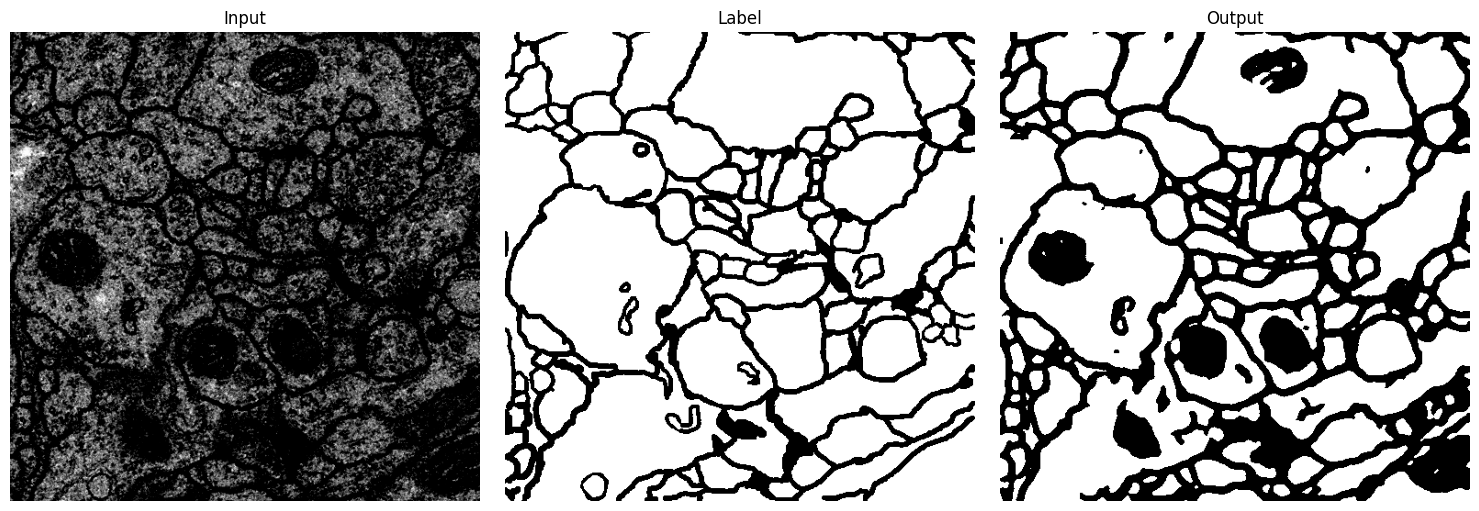

Test loss -> 0.43388524651527405


In [11]:
model.eval()

test_loss = 0.0

with torch.no_grad():
    for input, label in test_loader:
        input = input.float()
        label = label.long()

        output = model(input)
        print(output.shape)
        loss = loss_fn(output, label)
        test_loss += loss.item()

        plt.figure(figsize=(15, 5))

        input_img = input[0].squeeze()
        label_img = label[0].squeeze()
        output_img = output[0].squeeze().argmax(dim=0)
        print(output[0][0],output[0][1])
        print(output_img[0])

        plt.subplot(1, 3, 1)
        plt.imshow(input_img.cpu().numpy(), cmap='gray', vmin=0, vmax=1)
        plt.title("Input")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(label_img.cpu().numpy(), cmap='gray', vmin=0, vmax=1)
        plt.title("Label")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(output_img.cpu().numpy(), cmap='gray', vmin=0, vmax=1)
        plt.title("Output")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    print("Test loss ->", test_loss / len(test_loader))
